In [ ]:
import pandas as pd
import numpy as np

# Create date range
dates = pd.date_range(start="2025-01-01", periods=90, freq="D")

# Generate normal study hours
np.random.seed(42)
study_hours = np.random.normal(loc=3, scale=0.7, size=90)

# Add anomalies
study_hours[10] = 0
study_hours[25] = 0.3
study_hours[40] = 7
study_hours[65] = 8

# Clip values to realistic range
study_hours = np.clip(study_hours, 0, 8)

# Create DataFrame
df = pd.DataFrame({
    "date": dates,
    "study_hours": study_hours
})

# Save to CSV
df.to_csv("study_hours.csv", index=False)

df.head()


,date,study_hours
0,2025-01-01,3.347700
1,2025-01-02,2.903215
2,2025-01-03,3.453382
3,2025-01-04,4.066121
4,2025-01-05,2.836093


In [2]:
import pandas as pd

# Load the dataset from CSV
df = pd.read_csv("study_hours.csv")

# Show first 5 rows
df.head()


,date,study_hours
0,2025-01-01,3.347700
1,2025-01-02,2.903215
2,2025-01-03,3.453382
3,2025-01-04,4.066121
4,2025-01-05,2.836093


In [3]:
# Check basic information about the dataset
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         90 non-null     object 
 1   study_hours  90 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB


In [4]:
# Get basic statistical summary
df.describe()


,study_hours
count,90.000000
mean,2.953950
std,1.029731
min,0.000000
25%,2.531720
50%,2.886627
75%,3.356390
max,8.000000


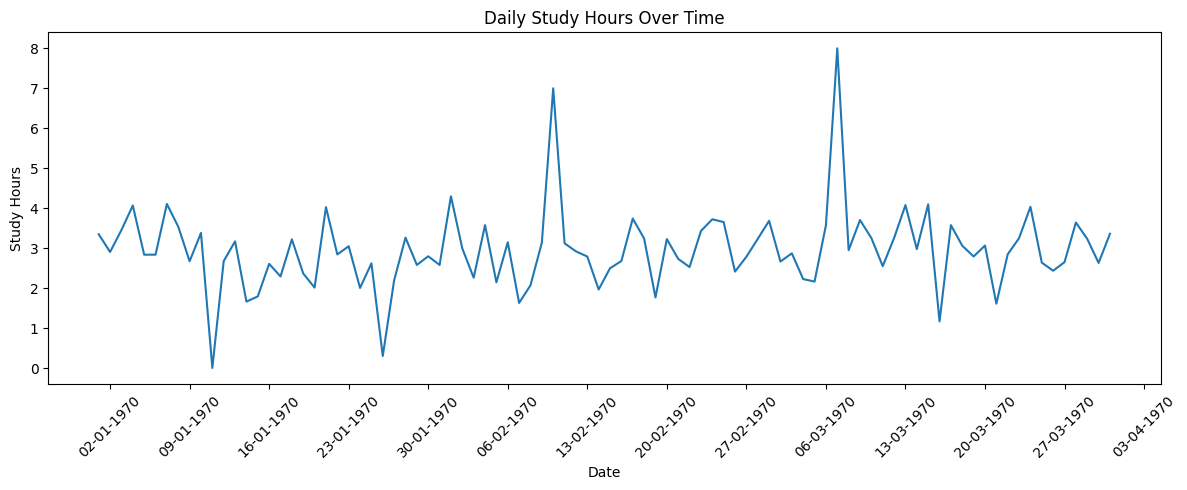

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plot daily study hours
plt.figure(figsize=(12,5))
plt.plot(df["date"], df["study_hours"])

# Format x-axis to show fewer dates
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Study Hours")
plt.title("Daily Study Hours Over Time")
plt.tight_layout()
plt.show()



In [16]:
#I pause for a while

In [17]:
#I am restarting the kernel

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Reload dataset
df = pd.read_csv("study_hours.csv")

# Convert date column back to datetime
df["date"] = pd.to_datetime(df["date"])

# STEP 5: Rolling statistics
df["rolling_mean"] = df["study_hours"].rolling(window=7).mean()
df["rolling_std"] = df["study_hours"].rolling(window=7).std()

# STEP 6: Anomaly thresholds
df["upper_limit"] = df["rolling_mean"] + (2 * df["rolling_std"])
df["lower_limit"] = df["rolling_mean"] - (2 * df["rolling_std"])

# Sanity check
df.head(15)


,date,study_hours,rolling_mean,rolling_std,upper_limit,lower_limit
0,2025-01-01,3.347700,NaN,NaN,NaN,NaN
1,2025-01-02,2.903215,NaN,NaN,NaN,NaN
2,2025-01-03,3.453382,NaN,NaN,NaN,NaN
3,2025-01-04,4.066121,NaN,NaN,NaN,NaN
4,2025-01-05,2.836093,NaN,NaN,NaN,NaN
5,2025-01-06,2.836104,NaN,NaN,NaN,NaN
6,2025-01-07,4.105449,3.364009,0.550857,4.465722,2.262296
7,2025-01-08,3.537204,3.391081,0.554566,4.500212,2.281950
8,2025-01-09,2.671368,3.357960,0.594075,4.546111,2.169809
9,2025-01-10,3.379792,3.347447,0.592755,4.532957,2.161937


In [20]:
# Flag anomalies based on thresholds
df["anomaly"] = (
    (df["study_hours"] > df["upper_limit"]) |
    (df["study_hours"] < df["lower_limit"])
).astype(int)

# Check how many anomalies were detected
df["anomaly"].value_counts()
# 1 → abnormal
# 0 → normal

,count
anomaly,
0,87
1,3


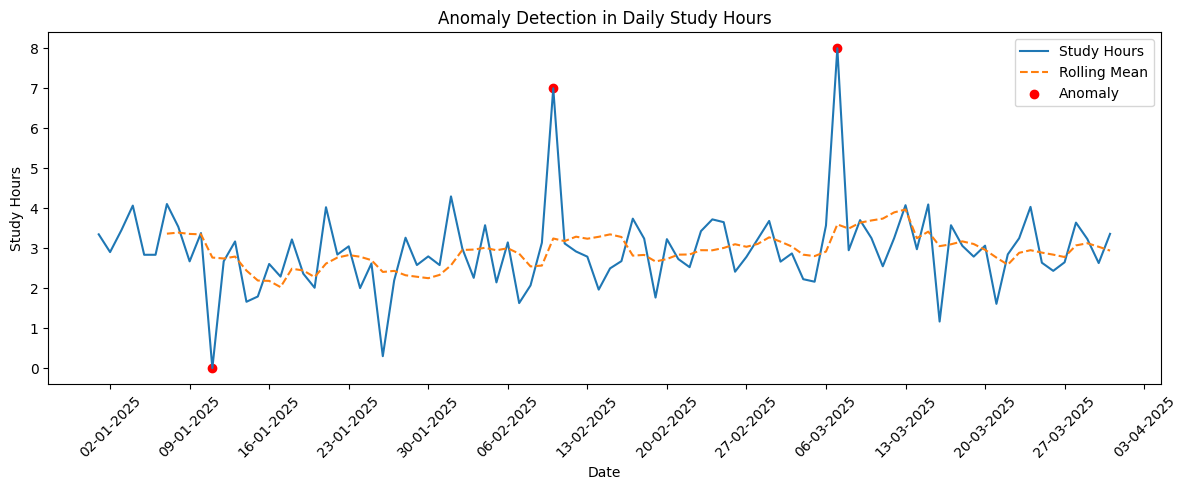

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(12,5))

# Plot study hours
plt.plot(df["date"], df["study_hours"], label="Study Hours")

# Plot rolling mean
plt.plot(df["date"], df["rolling_mean"], label="Rolling Mean", linestyle="--")

# Highlight anomalies
anomalies = df[df["anomaly"] == 1]
plt.scatter(anomalies["date"], anomalies["study_hours"], color="red", label="Anomaly")

# X-axis formatting
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.xticks(rotation=45)

plt.xlabel("Date")
plt.ylabel("Study Hours")
plt.title("Anomaly Detection in Daily Study Hours")
plt.legend()
plt.tight_layout()
plt.show()
